# *Machine learning Life Expectancy Regression project* 
`This dataset contains information compiled by the World Health Organization and the United Nations to track factors that affect life expectancy. The data contains 2938 rows and 22 columns. The columns include: country, year, developing status, adult mortality, life expectancy, infant deaths, alcohol consumption per capita, country’s expenditure on health, immunization coverage, BMI, deaths under 5-years-old, deaths due to HIV/AIDS, GDP, population, body condition, income information and education.`

![Image caption](images.jpg)

# *First import ML.RG libraries* #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [3]:
# Read dataset
Model_data=pd.read_csv('Life Expectancy Data.csv')

### **Data exploration**
1. Describe Dataset that showing statical info like mean,std ,etc..
2. info method that used to showing no of col and row,data types , non missing values
3. Corr between columns and variables
4. sum of nan values in dataset and duplicated , unique values

In [4]:
Model_data.head(10).style.background_gradient()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000000,263.000000,62,0.010000,71.279624,65.000000,1154,19.100000,83,6.000000,8.160000,65.000000,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000
1,Afghanistan,2014,Developing,59.900000,271.000000,64,0.010000,73.523582,62.000000,492,18.600000,86,58.000000,8.180000,62.000000,0.100000,612.696514,327582.000000,17.500000,17.500000,0.476000,10.000000
2,Afghanistan,2013,Developing,59.900000,268.000000,66,0.010000,73.219243,64.000000,430,18.100000,89,62.000000,8.130000,64.000000,0.100000,631.744976,31731688.000000,17.700000,17.700000,0.470000,9.900000
3,Afghanistan,2012,Developing,59.500000,272.000000,69,0.010000,78.184215,67.000000,2787,17.600000,93,67.000000,8.520000,67.000000,0.100000,669.959000,3696958.000000,17.900000,18.000000,0.463000,9.800000
4,Afghanistan,2011,Developing,59.200000,275.000000,71,0.010000,7.097109,68.000000,3013,17.200000,97,68.000000,7.870000,68.000000,0.100000,63.537231,2978599.000000,18.200000,18.200000,0.454000,9.500000
5,Afghanistan,2010,Developing,58.800000,279.000000,74,0.010000,79.679367,66.000000,1989,16.700000,102,66.000000,9.200000,66.000000,0.100000,553.328940,2883167.000000,18.400000,18.400000,0.448000,9.200000
6,Afghanistan,2009,Developing,58.600000,281.000000,77,0.010000,56.762217,63.000000,2861,16.200000,106,63.000000,9.420000,63.000000,0.100000,445.893298,284331.000000,18.600000,18.700000,0.434000,8.900000
7,Afghanistan,2008,Developing,58.100000,287.000000,80,0.030000,25.873925,64.000000,1599,15.700000,110,64.000000,8.330000,64.000000,0.100000,373.361116,2729431.000000,18.800000,18.900000,0.433000,8.700000
8,Afghanistan,2007,Developing,57.500000,295.000000,82,0.020000,10.910156,63.000000,1141,15.200000,113,63.000000,6.730000,63.000000,0.100000,369.835796,26616792.000000,19.000000,19.100000,0.415000,8.400000
9,Afghanistan,2006,Developing,57.300000,295.000000,84,0.030000,17.171518,64.000000,1990,14.700000,116,58.000000,7.430000,58.000000,0.100000,272.563770,2589345.000000,19.200000,19.300000,0.405000,8.100000


In [5]:
Model_data.tail(10).style.background_gradient()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.000000,587.000000,30,4.640000,1.040021,73.000000,853,29.000000,45,69.000000,6.260000,73.000000,18.100000,65.824121,1381599.000000,7.500000,7.400000,0.419000,9.900000
2929,Zimbabwe,2008,Developing,48.200000,632.000000,30,3.560000,20.843429,75.000000,0,28.600000,46,75.000000,4.960000,75.000000,20.500000,325.678573,13558469.000000,7.800000,7.800000,0.421000,9.700000
2930,Zimbabwe,2007,Developing,46.600000,67.000000,29,3.880000,29.814566,72.000000,242,28.200000,46,73.000000,4.470000,73.000000,23.700000,396.998217,1332999.000000,8.200000,8.200000,0.414000,9.600000
2931,Zimbabwe,2006,Developing,45.400000,7.000000,28,4.570000,34.262169,68.000000,212,27.900000,45,71.000000,5.120000,7.000000,26.800000,414.796232,13124267.000000,8.600000,8.600000,0.408000,9.500000
2932,Zimbabwe,2005,Developing,44.600000,717.000000,28,4.140000,8.717409,65.000000,420,27.500000,43,69.000000,6.440000,68.000000,30.300000,444.765750,129432.000000,9.000000,9.000000,0.406000,9.300000
2933,Zimbabwe,2004,Developing,44.300000,723.000000,27,4.360000,0.000000,68.000000,31,27.100000,42,67.000000,7.130000,65.000000,33.600000,454.366654,12777511.000000,9.400000,9.400000,0.407000,9.200000
2934,Zimbabwe,2003,Developing,44.500000,715.000000,26,4.060000,0.000000,7.000000,998,26.700000,41,7.000000,6.520000,68.000000,36.700000,453.351155,12633897.000000,9.800000,9.900000,0.418000,9.500000
2935,Zimbabwe,2002,Developing,44.800000,73.000000,25,4.430000,0.000000,73.000000,304,26.300000,40,73.000000,6.530000,71.000000,39.800000,57.348340,125525.000000,1.200000,1.300000,0.427000,10.000000
2936,Zimbabwe,2001,Developing,45.300000,686.000000,25,1.720000,0.000000,76.000000,529,25.900000,39,76.000000,6.160000,75.000000,42.100000,548.587312,12366165.000000,1.600000,1.700000,0.427000,9.800000
2937,Zimbabwe,2000,Developing,46.000000,665.000000,24,1.680000,0.000000,79.000000,1483,25.500000,39,78.000000,7.100000,78.000000,43.500000,547.358878,12222251.000000,11.000000,11.200000,0.434000,9.800000


In [6]:
Model_data.shape

(2938, 22)

In [7]:
# Convert to Data frame format
df=pd.DataFrame(Model_data)

In [8]:
df.describe().style.background_gradient()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.000000,2919.000000,2938.000000,2490.000000,2286.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,12753375.120052,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.498320,23.716912,5.077785,14270.169342,61012096.508428,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,34.000000,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.935626,195793.250000,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1386542.000000,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.492500,97.000000,0.800000,5910.806335,7420359.000000,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1293859294.000000,27.700000,28.600000,0.948000,20.700000


In [9]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
df.corr

<bound method DataFrame.corr of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \


In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
df.values

array([['Afghanistan', 2015, 'Developing', ..., 17.3, 0.479, 10.1],
       ['Afghanistan', 2014, 'Developing', ..., 17.5, 0.476, 10.0],
       ['Afghanistan', 2013, 'Developing', ..., 17.7, 0.47, 9.9],
       ...,
       ['Zimbabwe', 2002, 'Developing', ..., 1.3, 0.427, 10.0],
       ['Zimbabwe', 2001, 'Developing', ..., 1.7, 0.427, 9.8],
       ['Zimbabwe', 2000, 'Developing', ..., 11.2, 0.434, 9.8]],
      dtype=object)

In [13]:
df.duplicated

<bound method DataFrame.duplicated of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measle

In [14]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [16]:
df.duplicated().sum()

0

### **Data visualization**
1. Count the top 10 countries using seaborn plot
2. Count the down 10 countries
3. Count random choice of countries
4. see the Country with high life expectancy and same with low life ex
5. Detect the outlayers in Each Features
6. Showing THe values of Some important Features and Count it how many times it Appears
7. Make a Plotly Grapmap to detect the life expectancy in many Countries

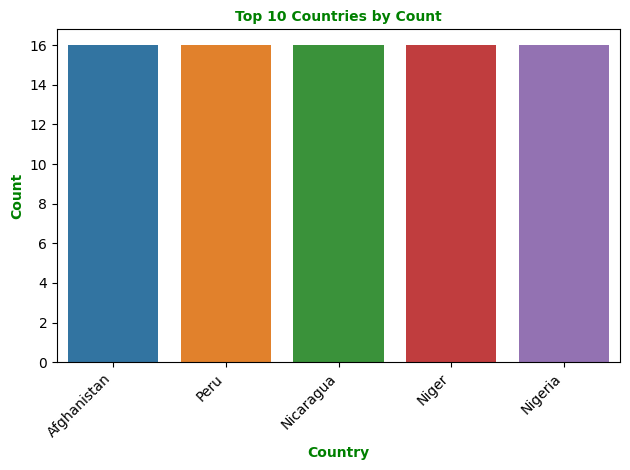

In [17]:
Country_count=df["Country"].value_counts().head(5)
# plt.figure(5,5)

font={"weight":"bold" ,"size":10,"color":"green"}

sns.barplot(x=Country_count.index ,y=Country_count.values)
plt.title("Top 10 Countries by Count", fontdict=font)
plt.xlabel("Country", fontdict=font)
plt.ylabel("Count", fontdict=font)

plt.xticks(rotation=45, ha="right") # note syntax

plt.tight_layout()
plt.show()

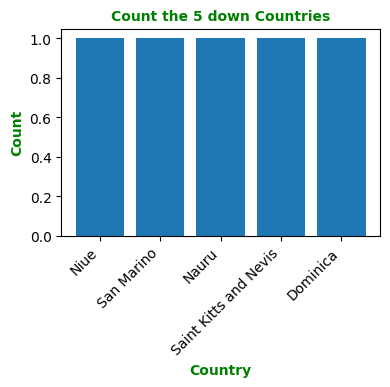

In [18]:
plt.figure(figsize=(4,3))
Country_count_d=df["Country"].value_counts().tail(5)
plt.bar(Country_count_d.index,Country_count_d.values)
plt.title("Count the 5 down Countries",fontdict=font)
plt.xlabel("Country",fontdict=font)
plt.ylabel("Count",fontdict=font)
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

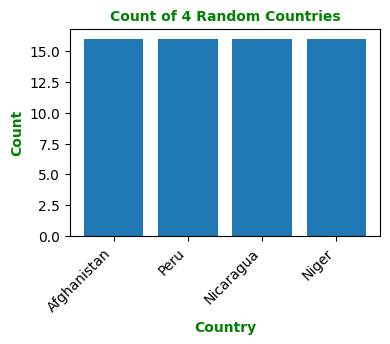

In [19]:
num_countries = np.random.randint(1,5)  # 1 to 5 (inclusive)
Country_count_random = df["Country"].value_counts().head(num_countries)

# Create the plot
plt.figure(figsize=(4,3))
plt.bar(Country_count_random.index, Country_count_random.values)

# Update title to reflect the random number of countries
plt.title(f"Count of {num_countries} Random Countries", fontdict=font)
plt.xlabel("Country", fontdict=font)
plt.ylabel("Count", fontdict=font)

plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

In [20]:
# Find the recent year
df["Year"].max()

2015

In [21]:
# Find the primary year

df["Year"].min()

2000

In [22]:
# Catorize the data based on col  data type
obj_col=[col for col in df.columns if df[col].dtype==object]
obj_col


['Country', 'Status']

In [23]:
num_col=[col for col in df.columns if df[col].dtype in ['float32', 'float64', 'int32', 'int64']]
num_col

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [24]:
# Country with high life Expectancy
country_vs_life = df.groupby('Country', as_index=False)['Life expectancy '].mean() # Notes syntax
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)


,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [25]:
# Countries with Lowest Life Expectancy
country_vs_life.sort_values(by = 'Life expectancy ', ascending = True).tail(10)


,Country,Life expectancy
38,Cook Islands,NaN
49,Dominica,NaN
105,Marshall Islands,NaN
110,Monaco,NaN
117,Nauru,NaN
124,Niue,NaN
128,Palau,NaN
142,Saint Kitts and Nevis,NaN
146,San Marino,NaN
178,Tuvalu,NaN


C:\Users\moham\AppData\Local\Temp\ipykernel_4112\1314276261.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist_kws=dict(edgecolor="k",
C:\Users\moham\AppData\Local\Temp\ipykernel_4112\1314276261.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], hist_kws=dict(edgecolor

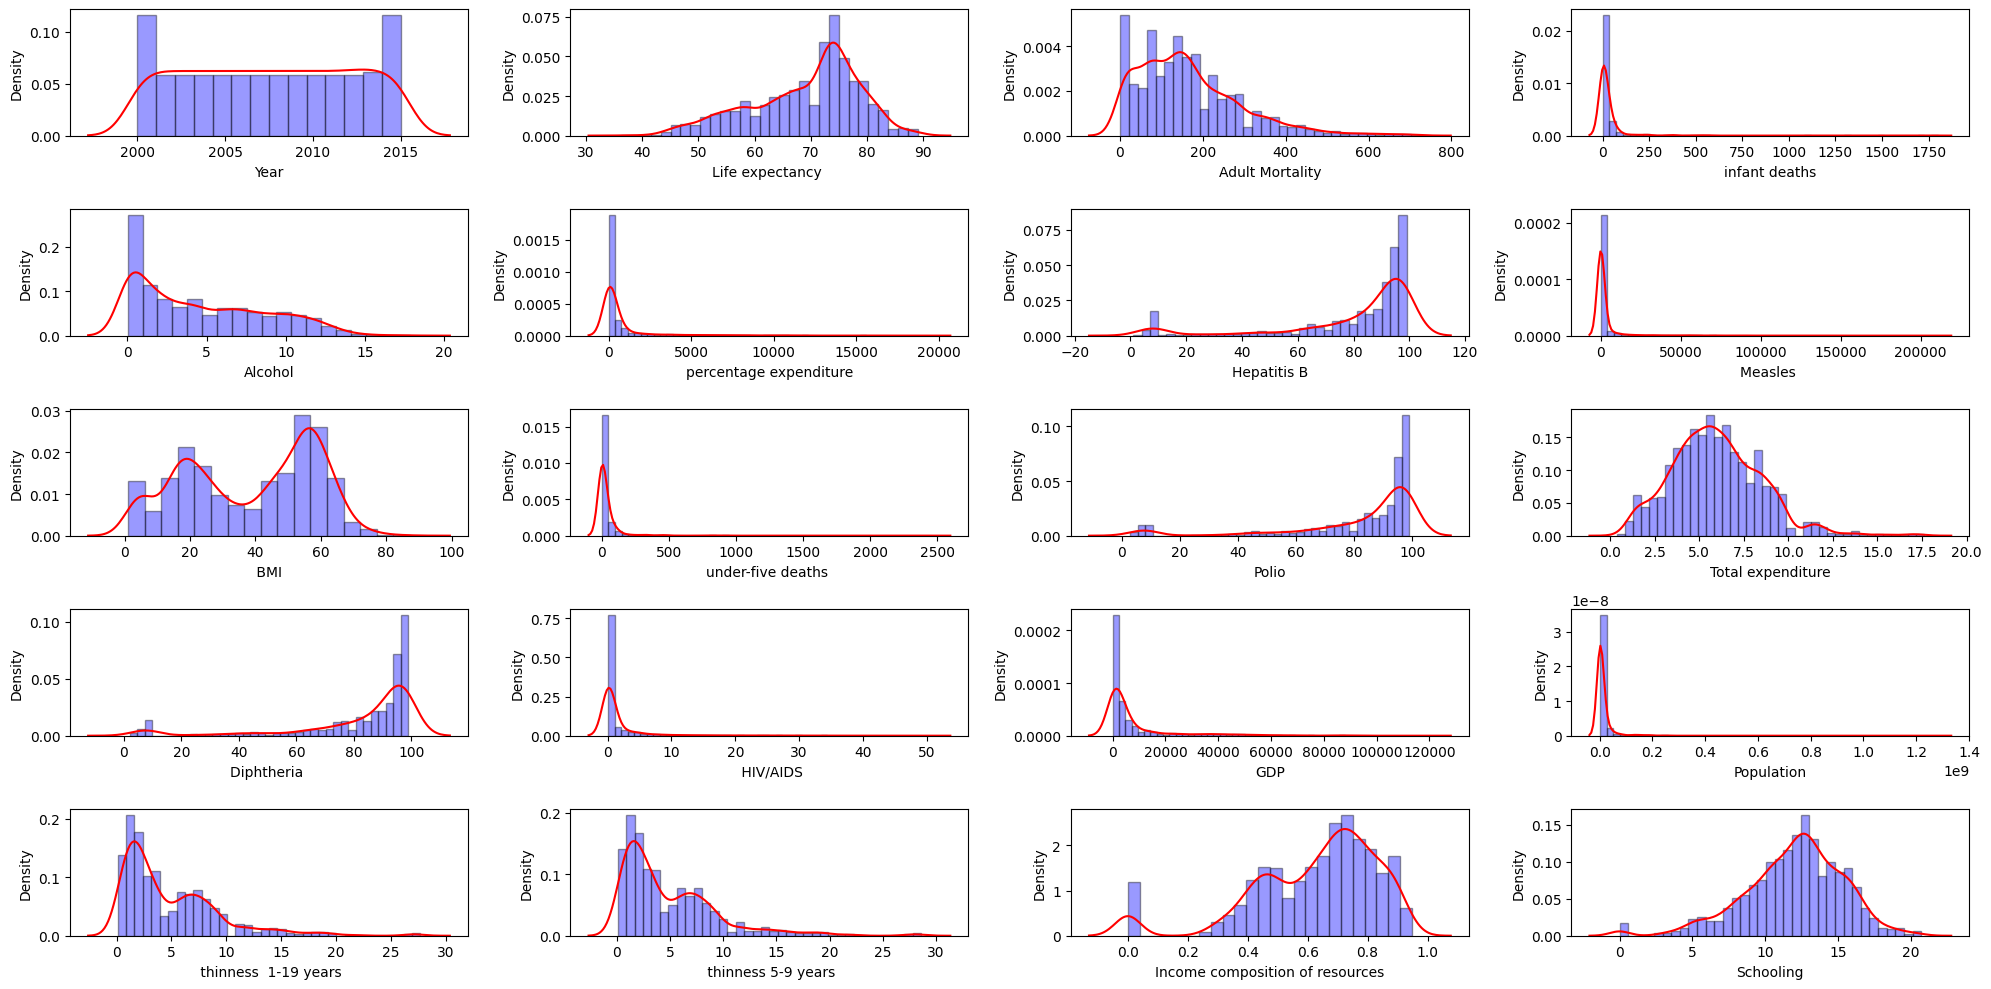

In [26]:
# Important section

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist() #Notes syntax

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df[col], hist_kws=dict(edgecolor="k",
                                         linewidth=1, color='blue'),
                                           color='red') #notes syntax
    count += 1
plt.tight_layout()
plt.show()


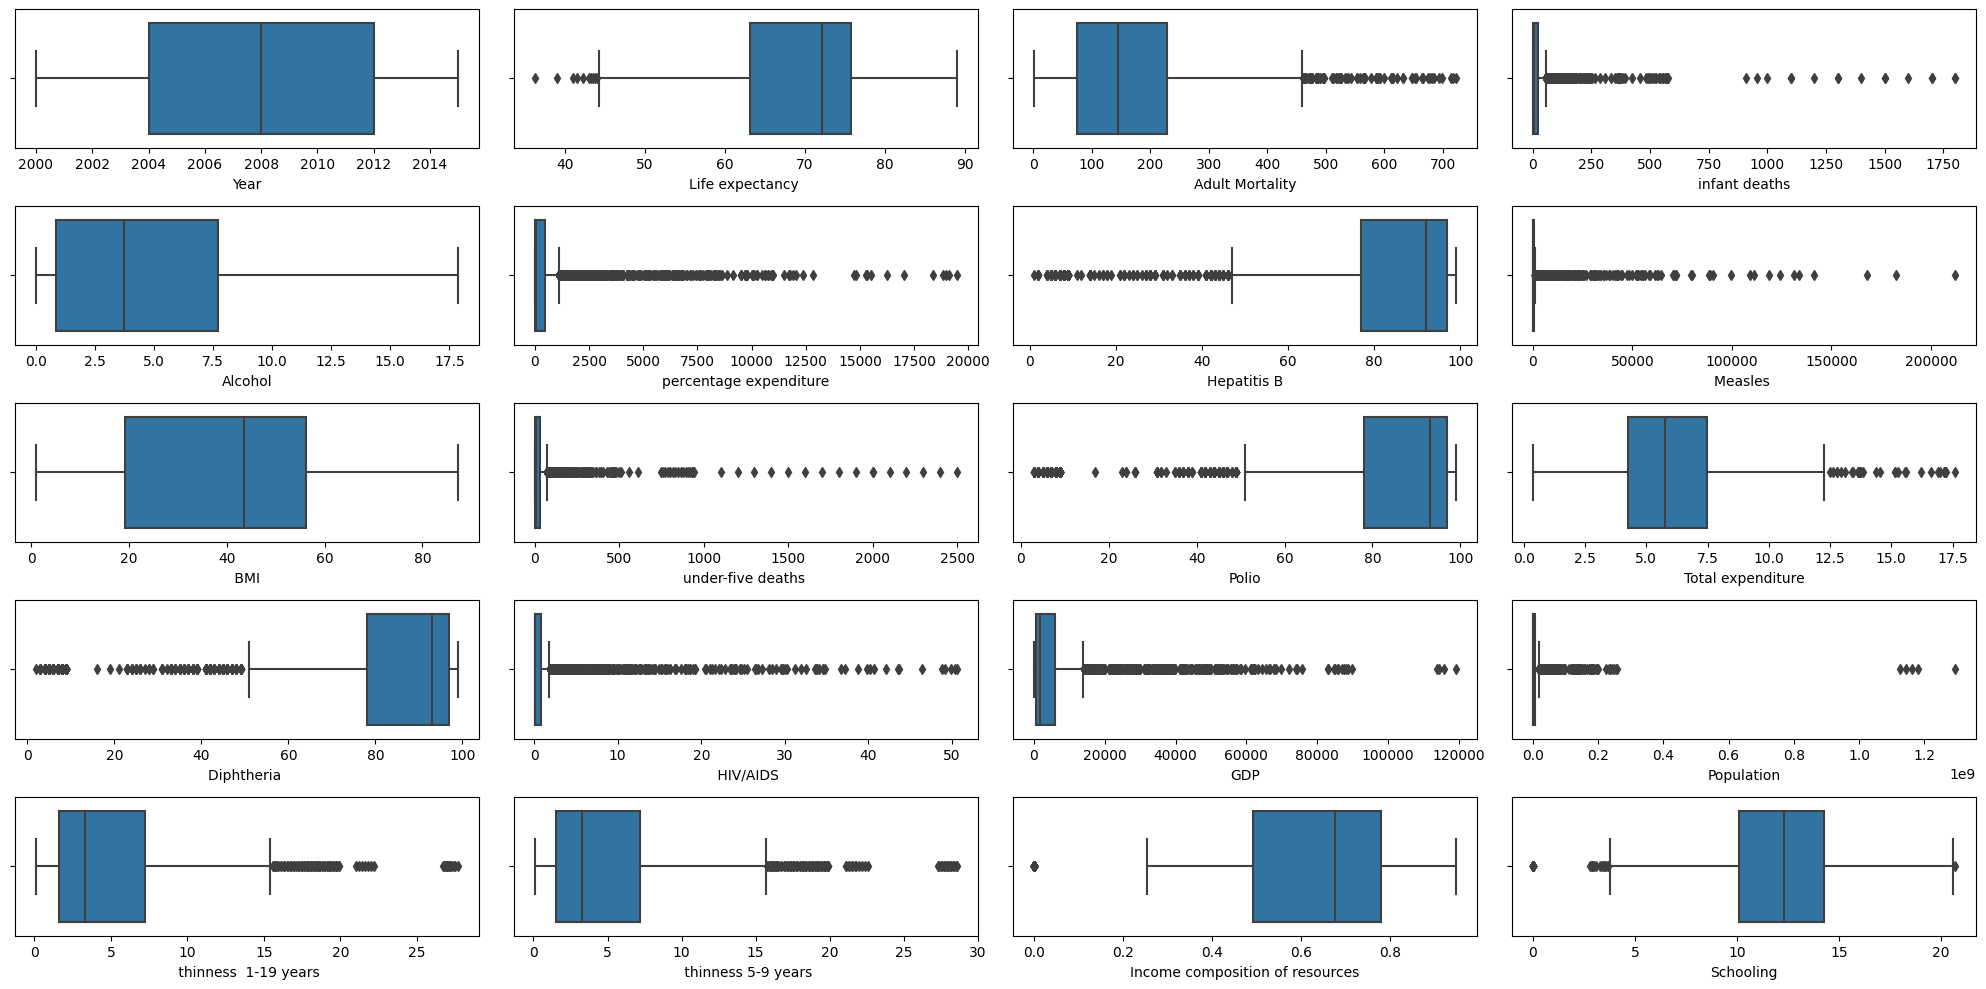

In [27]:
# detect the outlayer
count = 1

fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = df[col])
    count += 1
plt.tight_layout()
plt.show()

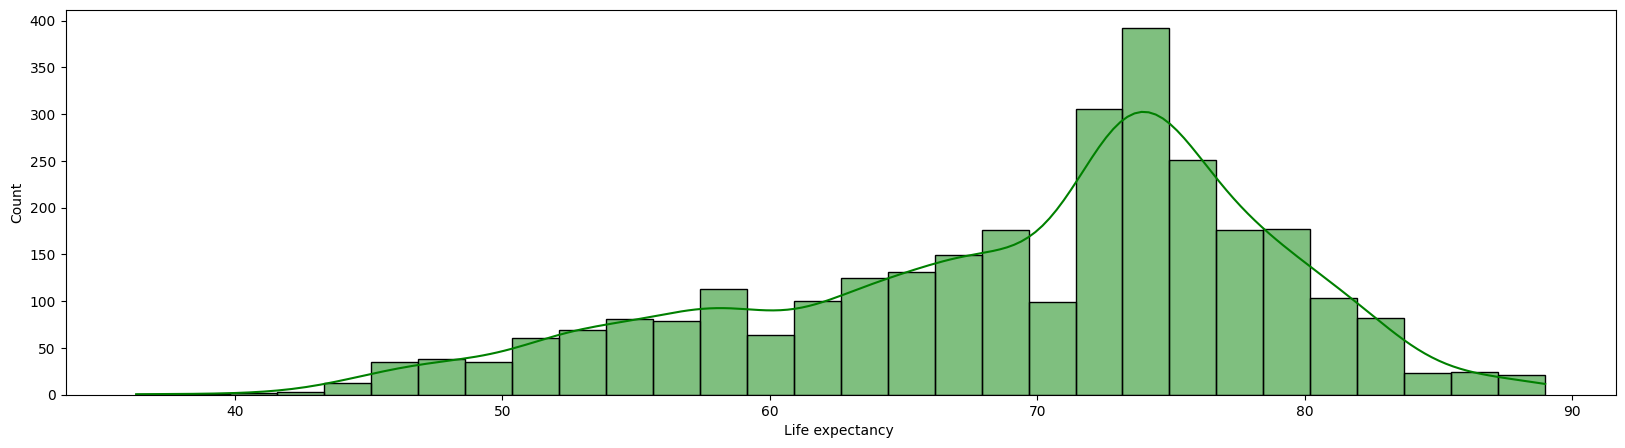

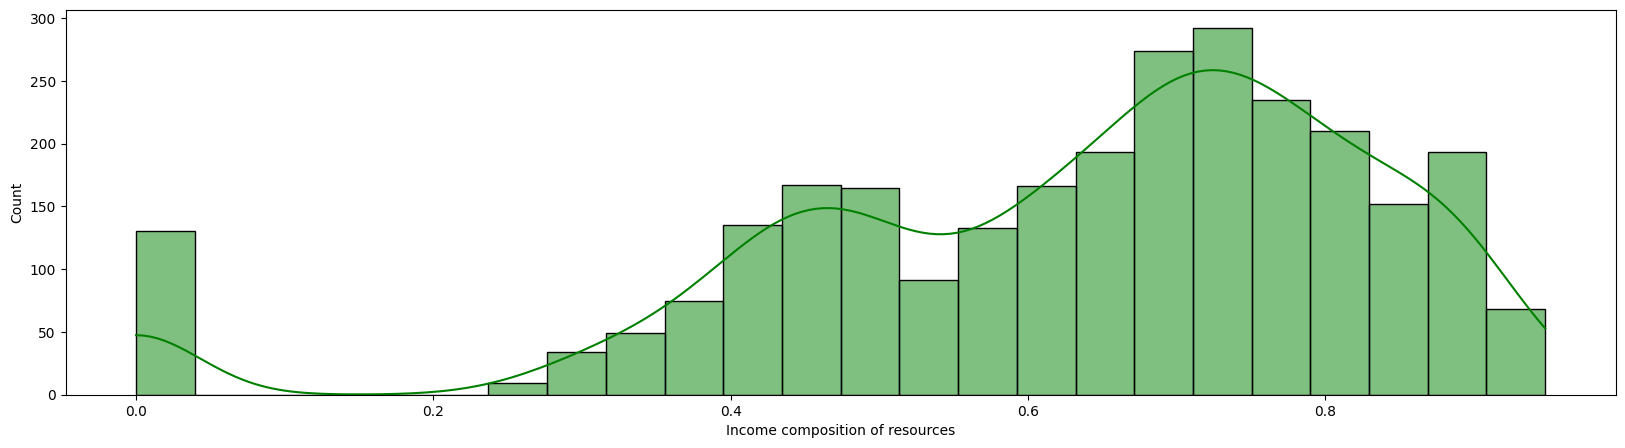

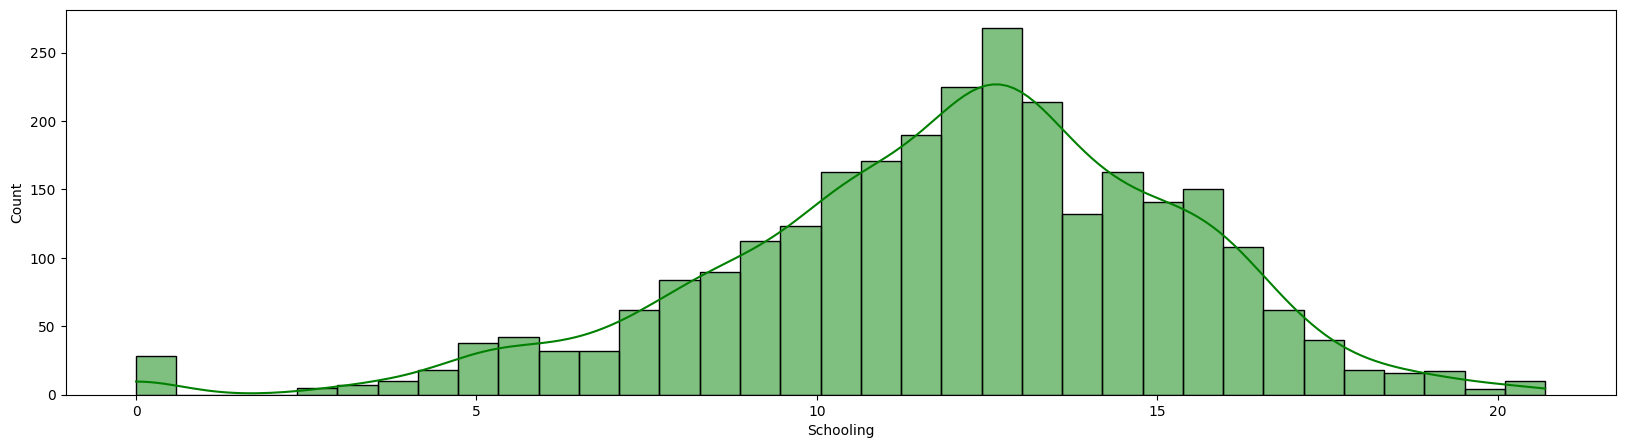

In [28]:
# Important Section
l= [df['Life expectancy '].dropna(), 
    df['Income composition of resources'].dropna(), 

    df['Schooling'].dropna()]

for i in l:
    plt.figure(figsize=[20,5])
    sns.histplot(i, kde=True, color="Green")

In [29]:
import pycountry_convert as pcc
Country_convert=[]
for i in df["Country"]:
      try :
        C_name_to_alpha=pcc.country_name_to_country_alpha2(i)
        C_alpha_to_code=pcc.country_alpha2_to_continent_code(C_name_to_alpha)
        Country_convert.append(C_alpha_to_code)
      except:
          Country_convert.append("Africa")

In [30]:
# add New list as a Column to Dataset
if len(Country_convert)==len(df):
    df["Country_Convert"]=Country_convert
else:
    print("not abel to add")

In [31]:
df["Country_Convert"]

0       AS
1       AS
2       AS
3       AS
4       AS
        ..
2933    AF
2934    AF
2935    AF
2936    AF
2937    AF
Name: Country_Convert, Length: 2938, dtype: object

In [32]:
new_df = df[["Country", "Life expectancy ", "GDP", "Population", "Country_Convert"]]
new_df.dropna(inplace = True)

C:\Users\moham\AppData\Local\Temp\ipykernel_4112\2270572869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace = True)


In [33]:
# Notes syntax

new_df= new_df.groupby(
    ['Country', 'Country_Convert']).mean().reset_index()

new_df['GDP'] = np.log10(new_df['GDP'] )

new_df.tail().style.background_gradient()

,Country,Country_Convert,Life expectancy,GDP,Population
138,Uruguay,SA,76.075000,3.856885,2396771.125000
139,Uzbekistan,AS,68.031250,2.813643,903631.687500
140,Vanuatu,OC,71.387500,3.301083,123096.187500
141,Zambia,AF,53.906250,2.909455,6260246.437500
142,Zimbabwe,AF,50.487500,2.613821,8021343.062500


` Note Af is the lowest One`

In [34]:
#notes
import plotly.express as px
df = px.data.gapminder()

figure = px.scatter(new_df, x="GDP", y="Life expectancy ",
                 size="Population", color="Country_Convert",
                 hover_name="Country", log_x=True, size_max=40)
figure.show()

# *Data preprocessed*
1. Remove Nan values
2. remove Outlayers Of each features

In [35]:
df.dropna()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [36]:
cols_outlayers = df.select_dtypes(exclude=['object']).columns.tolist()


Q1 = df[cols_outlayers].quantile(0.25)
Q3 = df[cols_outlayers].quantile(0.75)
Iqr = Q3 - Q1

outliers = ((df[cols_outlayers] < (Q1 - 1.5 * Iqr)) | 
            
            (df[cols_outlayers] > (Q3 + 1.5* Iqr))).any(axis=1)

df = df[~outliers]

df.head().style.background_gradient()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801000,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332000,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997000,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020000,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088000,13079460,739.981106,AFG,4


In [37]:
df.to_csv("Clean_Data.csv",index=False)

In [38]:
# plt.figure(figsize=(15,10))
# cmap = sns.diverging_palette(500, 10, as_cmap=True)
# sns.heatmap(df.corr(), cmap =cmap, center=0, annot=False, square=True)

# **Build Model Algorithms**
1. Using Linear Regression Algo With Grid Search Hyperparameter
2. Using Random Forest for Rg

In [39]:
# train test split
# df.columns
df.rename(columns={"lifeExp": "Life Expectancy"}, inplace=True) # notes syntax
df.columns

Index(['country', 'continent', 'year', 'Life Expectancy', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [40]:
Target=df["Life Expectancy"]
train_feature = df.drop("Life Expectancy", axis=1)

## Apply Dummy encoding to perform one-hot encoding

In [41]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(
    pd.get_dummies(train_feature), Target, test_size=0.2, random_state=42
)

# Further split the training and validation set into training and validation sets
# X_train, X_val, Y_train, Y_val = train_test_split(
#     X_train_val, Y_train_val, test_size=0.20, random_state=42
# )

In [42]:
#fit model
from sklearn.model_selection import GridSearchCV

alpha_values = [1,0.1,0.001,0.001,10]

ridge_reg = Ridge()

# Define the grid search parameters
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(estimator=ridge_reg , param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train_val, Y_train_val)

best_ridge_reg = grid_search.best_estimator_

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

Y_predict = best_ridge_reg.predict(X_test)

# Print the best alpha value
print(f"Best alpha value: {best_alpha}") 

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.46682e-18): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.81286e-18): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.44018e-18): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.26533e-18): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.26437e-18): result may not be accurate.

c:\Users\m

Best alpha value: 0.1


c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.87756e-21): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.8515e-21): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.05777e-21): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=4.3387e-21): result may not be accurate.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=3.98514e-21): result may not be accurate.

c:\Users\moh

## Display The Learning Curve "Error"

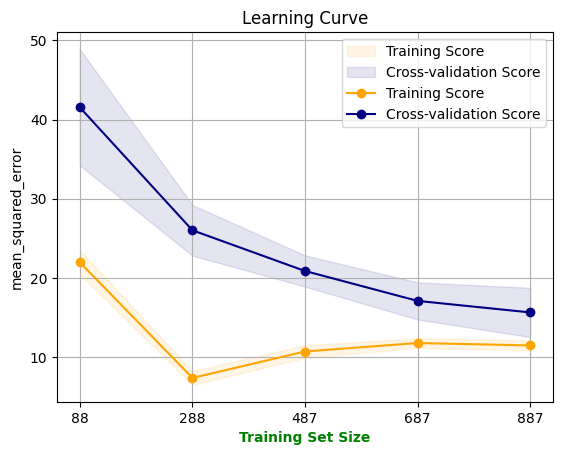

In [43]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y,cv=5, scoring='neg_mean_squared_error', title="Learning Curve",font=font):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, n_jobs=-1, 
                                                         cv=cv,scoring=scoring)

    train_scores_mean = abs(train_scores.mean(axis=1))
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = abs(test_scores.mean(axis=1))
    test_scores_std = test_scores.std(axis=1)

    plt.figure()
    plt.title(title)
    plt.grid(True)  
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=best_alpha, 
                     color="orange", label="Training Score")
    
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=best_alpha, 
                     color="navy", label="Cross-validation Score"
                     )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="navy", label="Cross-validation Score")
    plt.xlabel("Training Set Size",fontdict=font)
    plt.ylabel(scoring.replace("neg_", ""))
    plt.xticks(train_sizes)
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(best_ridge_reg, X_train_val, Y_train_val)

## Measure performance

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_predict)
rmse = mean_squared_error(Y_test, Y_predict, squared=False)
mae = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 13.19
Root Mean Squared Error: 3.63
Mean Absolute Error: 2.79
R-squared: 0.89


# *Visualization of performance*

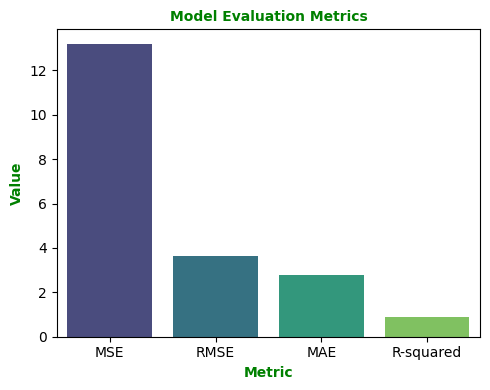

In [45]:
data = {'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
        'Value': [mse, rmse, mae, r2]}
df = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(5,4))
sns.barplot(data=df,x='Metric', y='Value', palette='viridis')
plt.title('Model Evaluation Metrics',fontdict=font)
plt.xlabel('Metric',fontdict=font)
plt.ylabel('Value',fontdict=font)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
R_F=RandomForestRegressor(random_state=42)
# Check The default Parameter
from pprint import pprint
pprint(R_F.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## **Hyper Parameter Tuning Of Random forest RG**

In [48]:
n_estimators=[int(x) for x in np.linspace(4,200,num=10)] # Number Of trees

max_depth=[int(x) for x in np.linspace(1,100,num=3)] # Max Depth of each tree

max_features=['auto','sqrt'] # Max Feature required at each split

min_samples_split=[1,2,5,10]# Defines a list of integer values for the minimum number of samples required to split an internal node

min_samples_leaf=[1,2,4,5] # Define min samples required at each leaf node

bootstrap=[True,False]

R_F_Grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(R_F_Grid)


{'bootstrap': [True, False],
 'max_depth': [1, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 5],
 'min_samples_split': [1, 2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [49]:
from sklearn.model_selection import RandomizedSearchCV


RF_Randcv = RandomizedSearchCV(estimator = R_F, param_distributions = R_F_Grid, 
                               n_iter = 100, cv = 5, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
RF_Randcv.fit(X_train_val, Y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


245 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
124 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=1)

In [50]:
RF_Randcv.best_params_

{'n_estimators': 91,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [51]:
RF_Randcv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=91, random_state=42)

In [52]:
errors =0
def model_performance(model, X_test, Y_test):
    Y_predict = model.predict(X_test)
    errors = mean_absolute_error(Y_test,Y_predict)
    # mape = 100 * np.mean(errors /Y_test)
    accuracy = 100 - errors
    print('Average Error: {:0.2f} .'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


print("Model Performance using Origin Parameter= ")
Origin_model = RandomForestRegressor() 
Origin_model.fit( X_test, Y_test)
origin_accuracy = model_performance(Origin_model, X_test, Y_test)


Model Performance using Origin Parameter= 
Average Error: 1.54 .
Accuracy = 98.46%.


In [53]:
print("Model Performance after using  Parameter tuning= ")

random_accuracy = model_performance(RF_Randcv.best_estimator_,  X_test, Y_test)

Model Performance after using  Parameter tuning= 
Average Error: 1.53 .
Accuracy = 98.47%.


In [54]:
Improvement= random_accuracy - origin_accuracy
print('Improvement of {:0.2f}%.'.format( Improvement))

Improvement of 0.01%.


## Plot a Feature importance

In [55]:
importances = RF_Randcv.best_estimator_.feature_importances_
Feature=train_feature.columns


In [56]:
plt.figure(figsize=(8,5))
RF_Randcv.best_estimator_[0]

DecisionTreeRegressor(max_depth=50, max_features='sqrt',
                      random_state=1608637542)

<Figure size 800x500 with 0 Axes>

## Save Model Weight

In [57]:
import joblib
# Save model to file
Random_Forest_Model=RF_Randcv.best_estimator_
joblib.dump(Random_Forest_Model,"Random_Forest_Model_LifeEX.pkl")

['Random_Forest_Model_LifeEX.pkl']

In [58]:
# Load Model
Model_LifeEx=joblib.load("Random_Forest_Model_LifeEX.pkl")

In [59]:
# review the original data set names
train_feature.columns

Index(['country', 'continent', 'year', 'pop', 'gdpPercap', 'iso_alpha',
       'iso_num'],
      dtype='object')

In [60]:
# Test model
train_feature

,country,continent,year,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,11926563,672.038623,ZWE,716


In [61]:
New_data=pd.read_csv("New_data.csv")
New_data.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [62]:
True_data=New_data["lifeExp"]
Test_data=New_data.drop("lifeExp",axis=1)

In [63]:
Test_data=pd.get_dummies(Test_data)


In [64]:
Prediction=Model_LifeEx.predict(Test_data)
print(int(Prediction[17]))

68


In [66]:
import streamlit as st
import joblib

# Load the model
model = joblib.load("Random_Forest_Model_LifeEX.pkl")

def predict(country, continent, year, pop, gdpPercap):
    features = [[country, continent, year, pop, gdpPercap]]
    prediction = model.predict(features)
    return prediction[0]

def main():
    st.title("Life Expectancy Prediction")

    # Input fields for each feature
    country = st.selectbox("Select Country", list(New_data['country'].unique()))
    continent = st.selectbox("Select Continent", list(New_data['continent'].unique()))
    year = st.number_input("Enter Year", min_value=1950, max_value=2050, step=1)
    pop = st.number_input("Enter Population")
    gdpPercap = st.number_input("Enter GDP per capita")

    if st.button("Predict Life Expectancy"):
        try:
            prediction = predict(country, continent, year, pop, gdpPercap)
            st.success(f"Predicted Life Expectancy: {prediction:.2f} years")
        except Exception as e:
            st.error(f"An error occurred: {str(e)}")

if __name__ == '__main__':
    main()

2024-12-17 21:48:05.952 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 21:48:06.900 
  command:

    streamlit run c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-17 21:48:06.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 21:48:06.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 21:48:06.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 21:48:06.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 21:48:06.915 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 21:48: